### Visualization
---

In [1]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

### Feature Dim = 300
---

### 20ng-lstm
---

In [2]:
dataset = '20ng'
model = 'lstm'
with open('./doc_embeddings/{}_{}_doc_vectors.txt'.format(dataset, model), 'r') as f:
    doc_embed = f.readlines()

In [3]:
X = []
for s in doc_embed:
    X.append(s.split())

In [4]:
feat_cols = [ 'embed_dim_'+str(i) for i in range(len(X[0])-2) ]
meta_cols = ["doc_id", "label"]
df = pd.DataFrame(X,columns=meta_cols+feat_cols)
df[feat_cols] = df[feat_cols].astype(float)
df['label'] = df['label'].apply(lambda x: int(x.split(":")[1]))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (7532, 202)


In [5]:
df_test = df[df.doc_id.str.contains('test')]

In [6]:
df_test.head()

doc_id  label  embed_dim_0  embed_dim_1  embed_dim_2  embed_dim_3  \
0  doc_test_id_0      2    -1.411809    -0.548601    -1.990520    -1.432060   
1  doc_test_id_1     10    -0.339720    -1.080734    -1.890195     0.232337   
2  doc_test_id_2     17    -1.927939    -1.748482    -1.008520    -1.566087   
3  doc_test_id_3     19    -1.974985    -1.229102     2.166174     1.946963   
4  doc_test_id_4      3     1.756245    -1.906903    -0.223994     0.384521   

   embed_dim_4  embed_dim_5  embed_dim_6  embed_dim_7  ...  embed_dim_190  \
0    -0.653293    -1.750108    -0.045307     0.458471  ...      -1.154546   
1     2.053768     0.120214    -0.771556     0.118465  ...      -0.118957   
2    -0.217793    -1.703672    -1.780708     0.386961  ...      -1.149058   
3    -2.702431    -1.018088     0.320732    -2.539340  ...      -0.673023   
4    -3.116951    -1.492206    -1.803825    -0.517941  ...       0.993550   

   embed_dim_191  embed_dim_192  embed_dim_193  embed_dim_194  embed_dim_195  \
0      -0.459896      -1.216993      -1.361748       0.245186      -1.541868   
1      -0.436993      -0.716285      -0.713222      -1.453792      -0.788251   
2      -0.460654      -0.645623      -1.077749      -1.577035      -1.137373   
3      -0.395631       0.615930       0.073673      -1.241575       0.799302   
4      -0.703050       0.454062      -0.732222      -2.448334      -1.093802   

   embed_dim_196  embed_dim_197  embed_dim_198  embed_dim_199  
0      -1.448768      -0.970332       1.927617      -1.063390  
1      -0.418056      -1.451333      -1.161502       0.309259  
2      -0.841302      -0.204805      -1.633887      -1.016192  
3      -0.301087      -1.020434       1.147652      -0.042882  
4      -0.054150      -1.615522      -1.534710      -0.536352  

[5 rows x 202 columns]

In [7]:
# Now lets only look at df_test
df = df_test.copy()
df.reset_index(drop=True, inplace=True)

#### PCA

In [8]:
df.head()

doc_id  label  embed_dim_0  embed_dim_1  embed_dim_2  embed_dim_3  \
0  doc_test_id_0      2    -1.411809    -0.548601    -1.990520    -1.432060   
1  doc_test_id_1     10    -0.339720    -1.080734    -1.890195     0.232337   
2  doc_test_id_2     17    -1.927939    -1.748482    -1.008520    -1.566087   
3  doc_test_id_3     19    -1.974985    -1.229102     2.166174     1.946963   
4  doc_test_id_4      3     1.756245    -1.906903    -0.223994     0.384521   

   embed_dim_4  embed_dim_5  embed_dim_6  embed_dim_7  ...  embed_dim_190  \
0    -0.653293    -1.750108    -0.045307     0.458471  ...      -1.154546   
1     2.053768     0.120214    -0.771556     0.118465  ...      -0.118957   
2    -0.217793    -1.703672    -1.780708     0.386961  ...      -1.149058   
3    -2.702431    -1.018088     0.320732    -2.539340  ...      -0.673023   
4    -3.116951    -1.492206    -1.803825    -0.517941  ...       0.993550   

   embed_dim_191  embed_dim_192  embed_dim_193  embed_dim_194  embed_dim_195  \
0      -0.459896      -1.216993      -1.361748       0.245186      -1.541868   
1      -0.436993      -0.716285      -0.713222      -1.453792      -0.788251   
2      -0.460654      -0.645623      -1.077749      -1.577035      -1.137373   
3      -0.395631       0.615930       0.073673      -1.241575       0.799302   
4      -0.703050       0.454062      -0.732222      -2.448334      -1.093802   

   embed_dim_196  embed_dim_197  embed_dim_198  embed_dim_199  
0      -1.448768      -0.970332       1.927617      -1.063390  
1      -0.418056      -1.451333      -1.161502       0.309259  
2      -0.841302      -0.204805      -1.633887      -1.016192  
3      -0.301087      -1.020434       1.147652      -0.042882  
4      -0.054150      -1.615522      -1.534710      -0.536352  

[5 rows x 202 columns]

In [9]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [10]:
N = min(10000, df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.10946568 0.06242613 0.04399522]


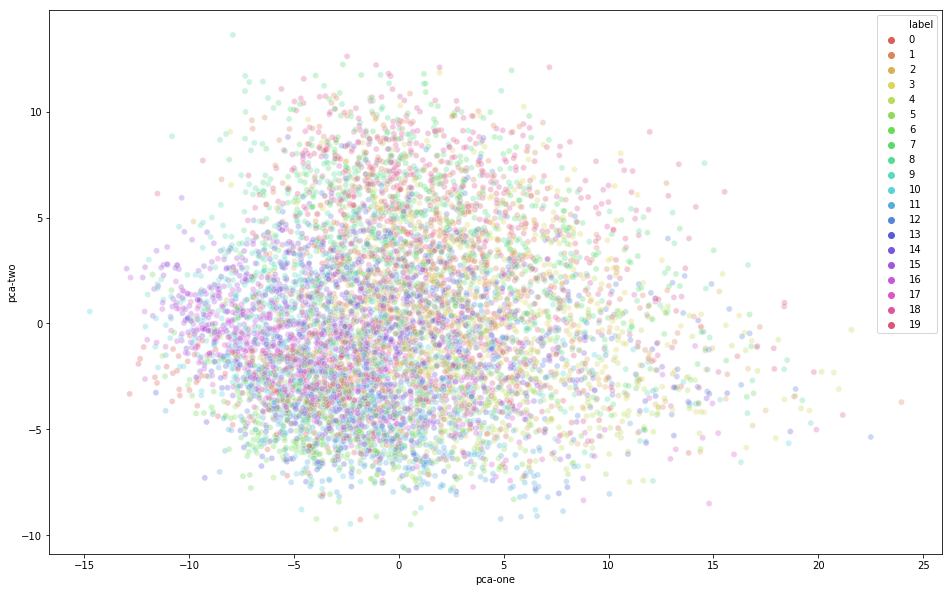

In [11]:
# 2d
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset.label.nunique()),
    data=df_subset.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

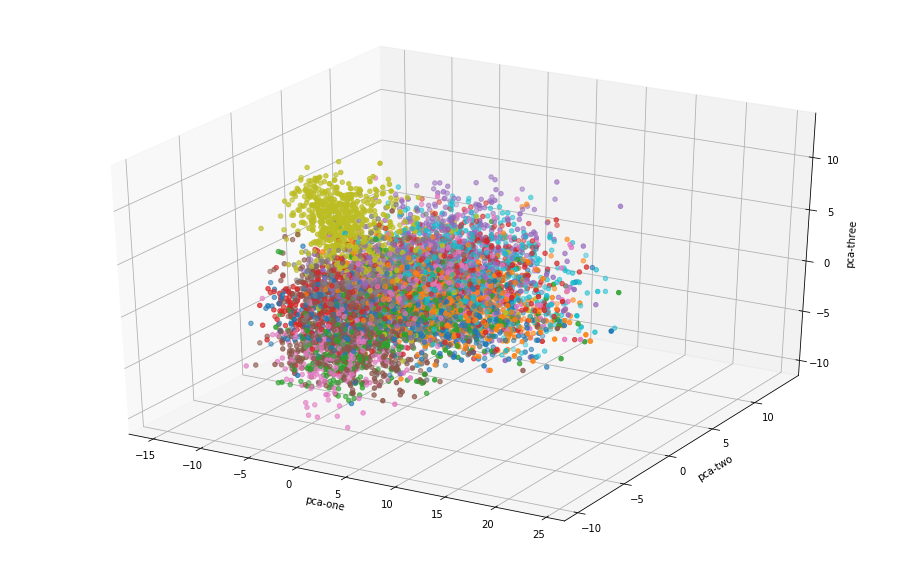

In [12]:
# 3d
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["pca-one"], 
    ys=df_subset.loc[rndperm,:]["pca-two"], 
    zs=df_subset.loc[rndperm,:]["pca-three"], 
    c=df_subset.loc[rndperm,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#### TSNE

In [13]:
np.random.seed(42)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7532 samples in 0.050s...
[t-SNE] Computed neighbors for 7532 samples in 32.593s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7532
[t-SNE] Computed conditional probabilities for sample 2000 / 7532
[t-SNE] Computed conditional probabilities for sample 3000 / 7532
[t-SNE] Computed conditional probabilities for sample 4000 / 7532
[t-SNE] Computed conditional probabilities for sample 5000 / 7532
[t-SNE] Computed conditional probabilities for sample 6000 / 7532
[t-SNE] Computed conditional probabilities for sample 7000 / 7532
[t-SNE] Computed conditional probabilities for sample 7532 / 7532
[t-SNE] Mean sigma: 4.282189
[t-SNE] KL divergence after 250 iterations with early exaggeration: 88.187790
[t-SNE] KL divergence after 300 iterations: 2.871830


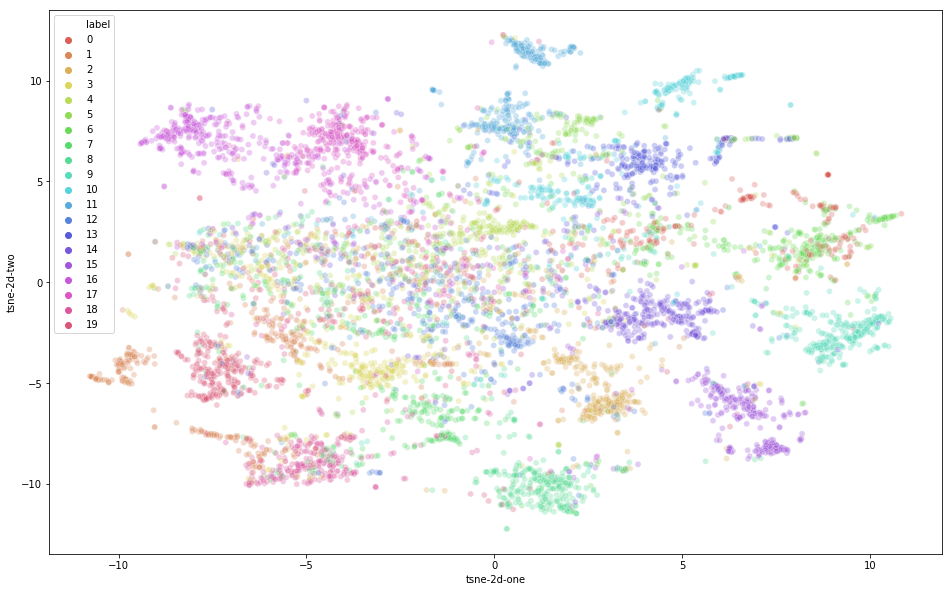

In [14]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset2 = df_subset#[df_subset['tsne-2d-two']]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset2.label.nunique()),
    data=df_subset2,
    legend="full",
    alpha=0.3
)

#### Combined

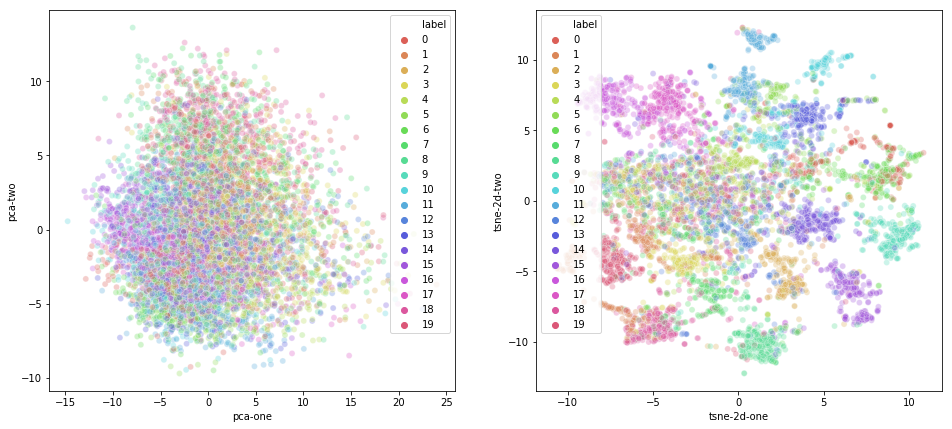

In [15]:
n_class = df_subset2.label.nunique()
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax2
)

### 20ng-transformer
---

In [16]:
dataset = '20ng'
model = 'transformer'
with open('./doc_embeddings/{}_{}_doc_vectors.txt'.format(dataset, model), 'r') as f:
    doc_embed = f.readlines()

In [17]:
X = []
for s in doc_embed:
    X.append(s.split())

In [18]:
feat_cols = [ 'embed_dim_'+str(i) for i in range(len(X[0])-2) ]
meta_cols = ["doc_id", "label"]
df = pd.DataFrame(X,columns=meta_cols+feat_cols)
df[feat_cols] = df[feat_cols].astype(float)
df['label'] = df['label'].apply(lambda x: int(x.split(":")[1]))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (7532, 302)


In [19]:
df_test = df[df.doc_id.str.contains('test')]

In [20]:
df_test.head()

doc_id  label  embed_dim_0  embed_dim_1  embed_dim_2  embed_dim_3  \
0  doc_test_id_0      2     4.922213     2.659947     1.138906     3.258049   
1  doc_test_id_1     10     4.647510     4.246463     2.233243     2.019255   
2  doc_test_id_2     17     0.225079     2.203926     1.805700     0.967849   
3  doc_test_id_3     19     0.834324     3.320248     1.210556     1.236906   
4  doc_test_id_4      3     4.831607     2.612563     1.167252     1.660774   

   embed_dim_4  embed_dim_5  embed_dim_6  embed_dim_7  ...  embed_dim_290  \
0     1.721183     2.657543     1.350010     2.448693  ...       1.115296   
1     1.515727     2.154212     1.829878     1.902276  ...       1.277657   
2     1.569387     2.909243     1.251518     2.447709  ...       1.779309   
3     1.475355     2.153898     1.285012     1.893225  ...       1.486095   
4     1.678260     2.579027     1.188444     1.628449  ...       2.803109   

   embed_dim_291  embed_dim_292  embed_dim_293  embed_dim_294  embed_dim_295  \
0       1.731561       1.241466       3.452063       1.787923       2.270305   
1       2.391081       1.422975       3.422982       2.011907       1.597844   
2       1.257913       1.064135       1.937304       2.533842       0.761570   
3       1.831250       2.146539       1.865387       2.183534       1.894913   
4       2.431459       2.127044       1.259571       1.775272       2.887599   

   embed_dim_296  embed_dim_297  embed_dim_298  embed_dim_299  
0       2.624920       2.512266       2.353273       2.995423  
1       3.536890       2.661477       1.764545       2.307694  
2       2.372912       2.472117       1.508182       2.900696  
3       3.810110       3.068185       1.987264       2.621111  
4       2.511018       2.110537       1.174735       2.792774  

[5 rows x 302 columns]

In [21]:
# Now lets only look at df_test
df = df_test.copy()
df.reset_index(drop=True, inplace=True)

#### PCA

In [22]:
df.head()

doc_id  label  embed_dim_0  embed_dim_1  embed_dim_2  embed_dim_3  \
0  doc_test_id_0      2     4.922213     2.659947     1.138906     3.258049   
1  doc_test_id_1     10     4.647510     4.246463     2.233243     2.019255   
2  doc_test_id_2     17     0.225079     2.203926     1.805700     0.967849   
3  doc_test_id_3     19     0.834324     3.320248     1.210556     1.236906   
4  doc_test_id_4      3     4.831607     2.612563     1.167252     1.660774   

   embed_dim_4  embed_dim_5  embed_dim_6  embed_dim_7  ...  embed_dim_290  \
0     1.721183     2.657543     1.350010     2.448693  ...       1.115296   
1     1.515727     2.154212     1.829878     1.902276  ...       1.277657   
2     1.569387     2.909243     1.251518     2.447709  ...       1.779309   
3     1.475355     2.153898     1.285012     1.893225  ...       1.486095   
4     1.678260     2.579027     1.188444     1.628449  ...       2.803109   

   embed_dim_291  embed_dim_292  embed_dim_293  embed_dim_294  embed_dim_295  \
0       1.731561       1.241466       3.452063       1.787923       2.270305   
1       2.391081       1.422975       3.422982       2.011907       1.597844   
2       1.257913       1.064135       1.937304       2.533842       0.761570   
3       1.831250       2.146539       1.865387       2.183534       1.894913   
4       2.431459       2.127044       1.259571       1.775272       2.887599   

   embed_dim_296  embed_dim_297  embed_dim_298  embed_dim_299  
0       2.624920       2.512266       2.353273       2.995423  
1       3.536890       2.661477       1.764545       2.307694  
2       2.372912       2.472117       1.508182       2.900696  
3       3.810110       3.068185       1.987264       2.621111  
4       2.511018       2.110537       1.174735       2.792774  

[5 rows x 302 columns]

In [23]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [24]:
N = min(10000, df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.11325635 0.04529549 0.02973398]


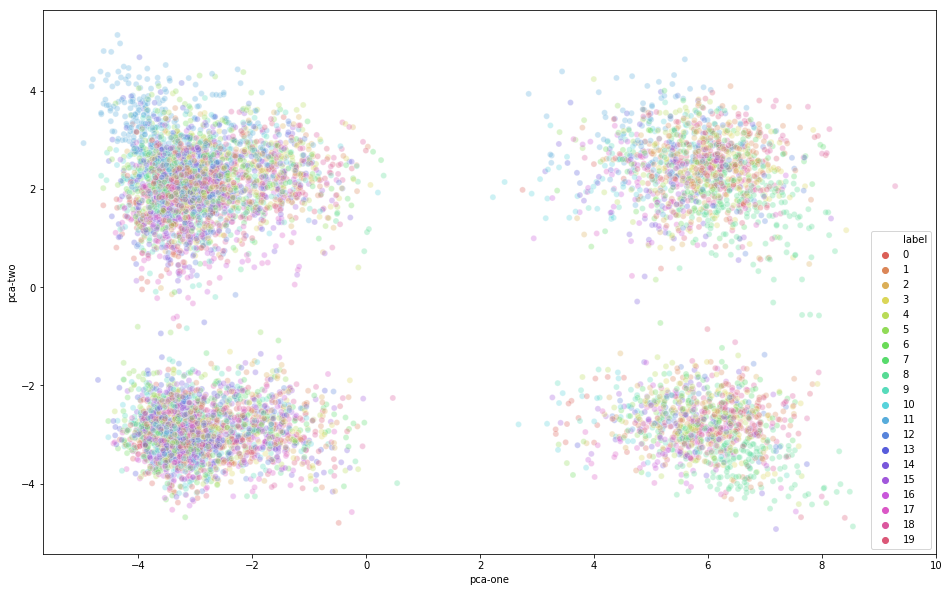

In [25]:
# 2d
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset.label.nunique()),
    data=df_subset.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

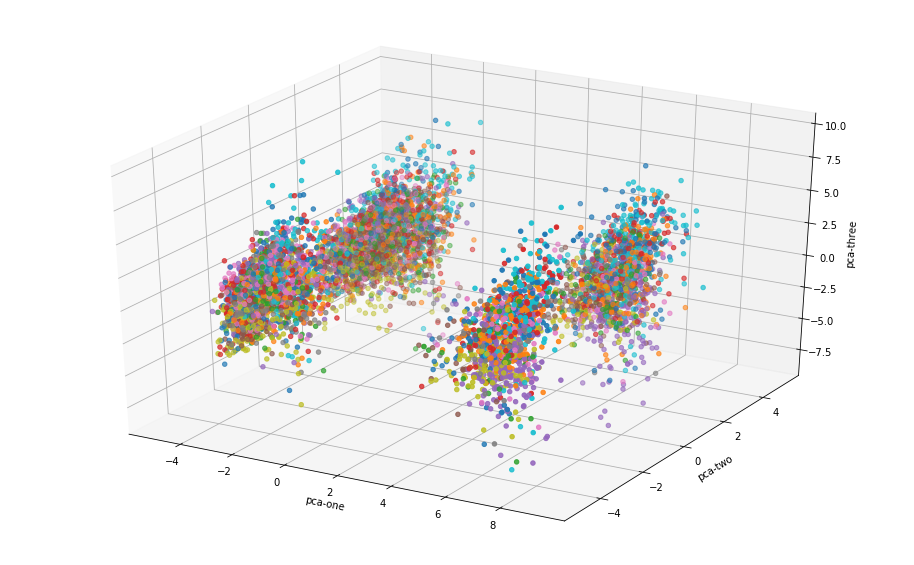

In [26]:
# 3d
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["pca-one"], 
    ys=df_subset.loc[rndperm,:]["pca-two"], 
    zs=df_subset.loc[rndperm,:]["pca-three"], 
    c=df_subset.loc[rndperm,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#### TSNE

In [27]:
np.random.seed(42)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7532 samples in 0.095s...
[t-SNE] Computed neighbors for 7532 samples in 38.796s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7532
[t-SNE] Computed conditional probabilities for sample 2000 / 7532
[t-SNE] Computed conditional probabilities for sample 3000 / 7532
[t-SNE] Computed conditional probabilities for sample 4000 / 7532
[t-SNE] Computed conditional probabilities for sample 5000 / 7532
[t-SNE] Computed conditional probabilities for sample 6000 / 7532
[t-SNE] Computed conditional probabilities for sample 7000 / 7532
[t-SNE] Computed conditional probabilities for sample 7532 / 7532
[t-SNE] Mean sigma: 3.298809
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.004898
[t-SNE] KL divergence after 300 iterations: 3.129930


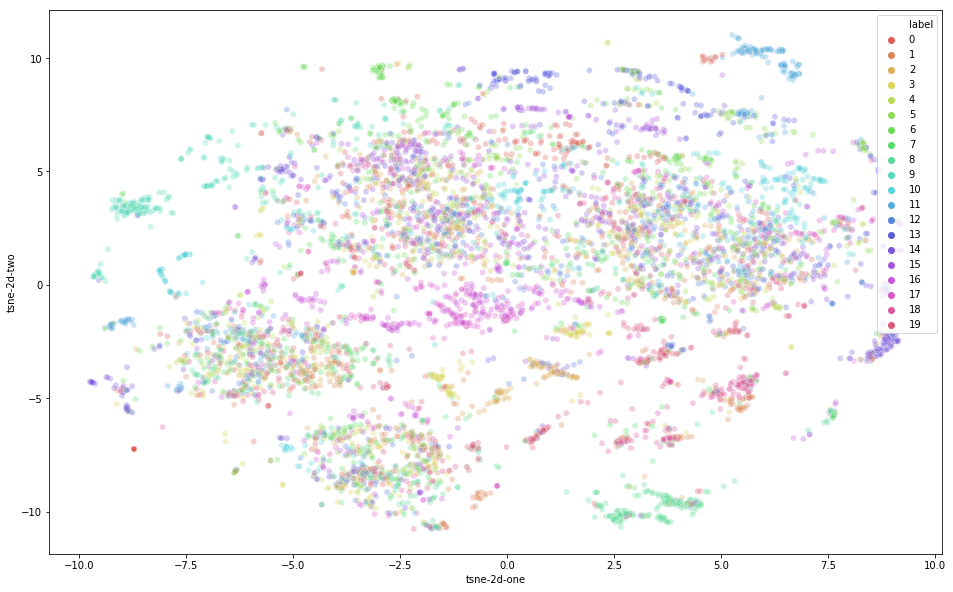

In [28]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset2 = df_subset # [df_subset['tsne-2d-two'] < 15]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset2.label.nunique()),
    data=df_subset2,
    legend="full",
    alpha=0.3
)

#### Combined

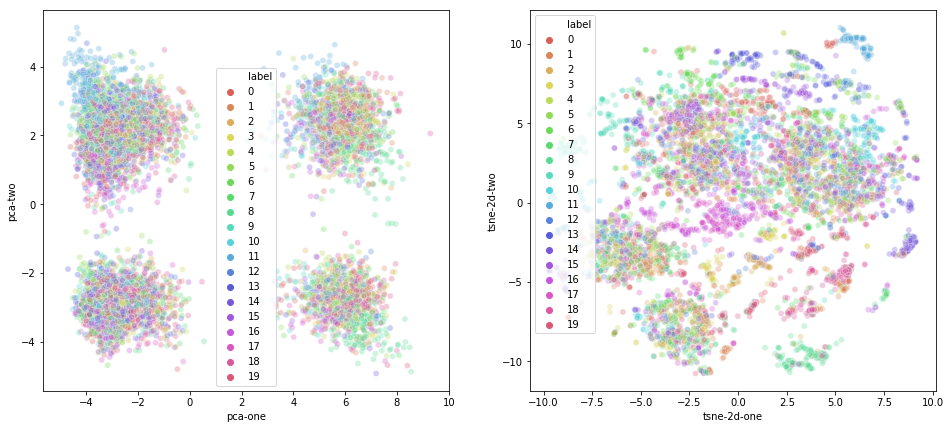

In [29]:
n_class = df_subset2.label.nunique()
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax2
)

### 20ng-ddcnn
---

In [30]:
dataset = '20ng'
model = 'ddcnn'
with open('./doc_embeddings/{}_{}_doc_vectors.txt'.format(dataset, model), 'r') as f:
    doc_embed = f.readlines()

In [31]:
X = []
for s in doc_embed:
    X.append(s.split())

In [32]:
feat_cols = [ 'embed_dim_'+str(i) for i in range(len(X[0])-2) ]
meta_cols = ["doc_id", "label"]
df = pd.DataFrame(X,columns=meta_cols+feat_cols)
df[feat_cols] = df[feat_cols].astype(float)
df['label'] = df['label'].apply(lambda x: int(x.split(":")[1]))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (7532, 602)


In [33]:
df_test = df[df.doc_id.str.contains('test')]

In [34]:
df_test.head()

doc_id  label  embed_dim_0  embed_dim_1  embed_dim_2  embed_dim_3  \
0  doc_test_id_0      2    -1.998026    -0.701236    -1.789302    -1.432842   
1  doc_test_id_1     10    -1.646841    -0.196506    -1.824567     0.383201   
2  doc_test_id_2     17    -1.219626    -2.059621    -1.822258    -1.610512   
3  doc_test_id_3     19    -1.402405     0.808903    -0.919267    -1.269234   
4  doc_test_id_4      3     0.303766    -0.446387    -1.249386    -1.010781   

   embed_dim_4  embed_dim_5  embed_dim_6  embed_dim_7  ...  embed_dim_590  \
0    -1.051962    -2.004826    -1.396898    -1.029958  ...      -1.486236   
1    -1.524522    -1.693473     0.313095    -0.546943  ...      -0.746045   
2    -2.147511    -1.000521    -2.015132    -2.457096  ...      -2.599961   
3    -1.031440    -2.231262    -1.128204     0.152589  ...       0.180636   
4    -1.155757    -1.989321     0.462874    -1.400440  ...      -0.487819   

   embed_dim_591  embed_dim_592  embed_dim_593  embed_dim_594  embed_dim_595  \
0      -1.595301       0.346877       2.655022      -1.762501      -1.169420   
1      -0.926391      -0.551354      -0.753537       0.038098      -1.386144   
2      -2.228654      -0.661741      -2.700622       0.617444      -0.994199   
3      -2.008110      -0.378304      -1.175892       0.487425       0.339690   
4       0.307931       0.317310      -1.617414       1.196027      -2.039967   

   embed_dim_596  embed_dim_597  embed_dim_598  embed_dim_599  
0       1.773554      -0.545427       0.616496      -0.433823  
1       0.377522      -1.168603      -1.451583       0.222561  
2       0.026729      -1.478953      -1.228373      -2.892195  
3      -0.926456       0.923039      -0.414836      -0.606366  
4       1.367718      -0.925012      -0.383806      -2.061872  

[5 rows x 602 columns]

In [35]:
# Now lets only look at df_test
df = df_test.copy()
df.reset_index(drop=True, inplace=True)

#### PCA

In [36]:
df.head()

doc_id  label  embed_dim_0  embed_dim_1  embed_dim_2  embed_dim_3  \
0  doc_test_id_0      2    -1.998026    -0.701236    -1.789302    -1.432842   
1  doc_test_id_1     10    -1.646841    -0.196506    -1.824567     0.383201   
2  doc_test_id_2     17    -1.219626    -2.059621    -1.822258    -1.610512   
3  doc_test_id_3     19    -1.402405     0.808903    -0.919267    -1.269234   
4  doc_test_id_4      3     0.303766    -0.446387    -1.249386    -1.010781   

   embed_dim_4  embed_dim_5  embed_dim_6  embed_dim_7  ...  embed_dim_590  \
0    -1.051962    -2.004826    -1.396898    -1.029958  ...      -1.486236   
1    -1.524522    -1.693473     0.313095    -0.546943  ...      -0.746045   
2    -2.147511    -1.000521    -2.015132    -2.457096  ...      -2.599961   
3    -1.031440    -2.231262    -1.128204     0.152589  ...       0.180636   
4    -1.155757    -1.989321     0.462874    -1.400440  ...      -0.487819   

   embed_dim_591  embed_dim_592  embed_dim_593  embed_dim_594  embed_dim_595  \
0      -1.595301       0.346877       2.655022      -1.762501      -1.169420   
1      -0.926391      -0.551354      -0.753537       0.038098      -1.386144   
2      -2.228654      -0.661741      -2.700622       0.617444      -0.994199   
3      -2.008110      -0.378304      -1.175892       0.487425       0.339690   
4       0.307931       0.317310      -1.617414       1.196027      -2.039967   

   embed_dim_596  embed_dim_597  embed_dim_598  embed_dim_599  
0       1.773554      -0.545427       0.616496      -0.433823  
1       0.377522      -1.168603      -1.451583       0.222561  
2       0.026729      -1.478953      -1.228373      -2.892195  
3      -0.926456       0.923039      -0.414836      -0.606366  
4       1.367718      -0.925012      -0.383806      -2.061872  

[5 rows x 602 columns]

In [37]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [38]:
N = min(10000, df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.06980471 0.01865409 0.01404432]


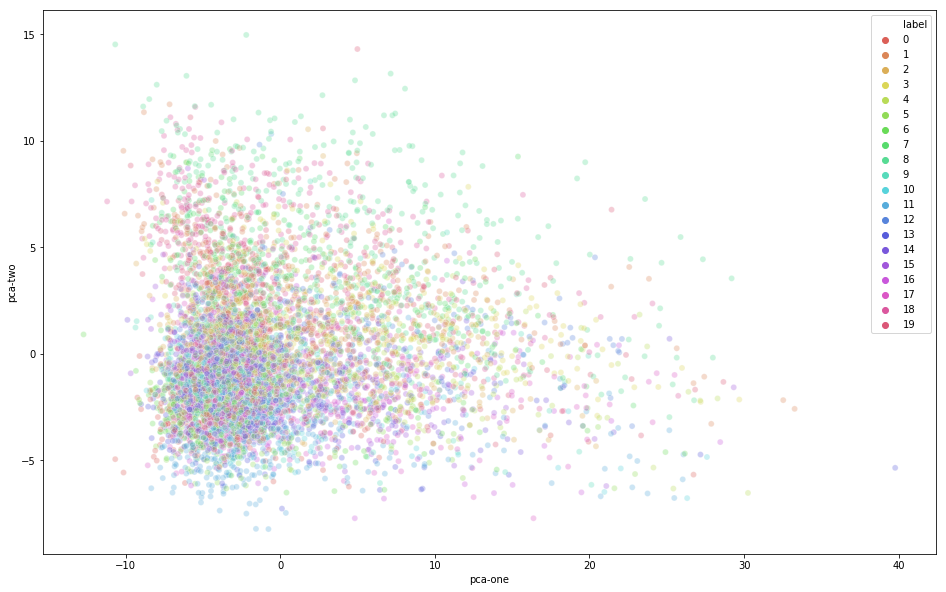

In [39]:
# 2d
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset.label.nunique()),
    data=df_subset.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

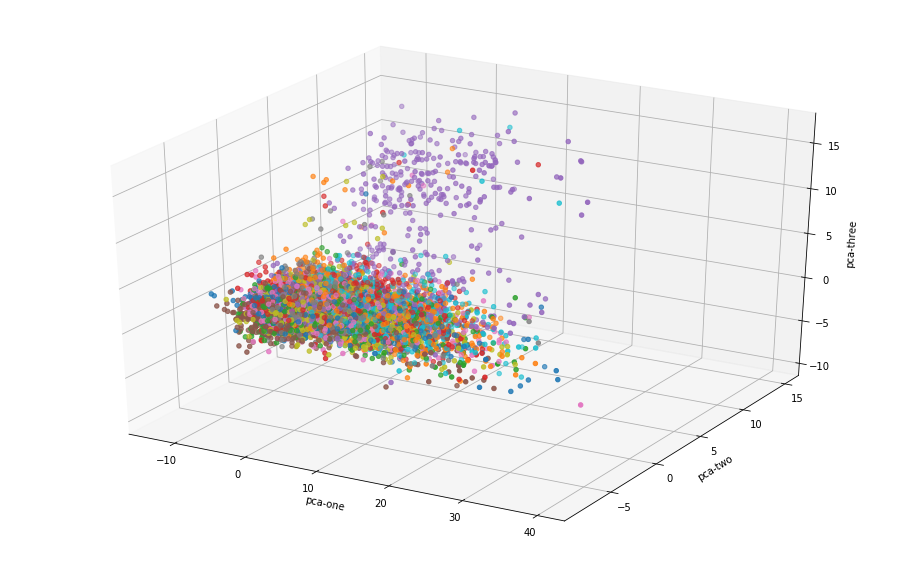

In [40]:
# 3d
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["pca-one"], 
    ys=df_subset.loc[rndperm,:]["pca-two"], 
    zs=df_subset.loc[rndperm,:]["pca-three"], 
    c=df_subset.loc[rndperm,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#### TSNE

In [41]:
np.random.seed(42)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7532 samples in 0.173s...
[t-SNE] Computed neighbors for 7532 samples in 75.398s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7532
[t-SNE] Computed conditional probabilities for sample 2000 / 7532
[t-SNE] Computed conditional probabilities for sample 3000 / 7532
[t-SNE] Computed conditional probabilities for sample 4000 / 7532
[t-SNE] Computed conditional probabilities for sample 5000 / 7532
[t-SNE] Computed conditional probabilities for sample 6000 / 7532
[t-SNE] Computed conditional probabilities for sample 7000 / 7532
[t-SNE] Computed conditional probabilities for sample 7532 / 7532
[t-SNE] Mean sigma: 5.588756
[t-SNE] KL divergence after 250 iterations with early exaggeration: 93.485275
[t-SNE] KL divergence after 300 iterations: 3.471057


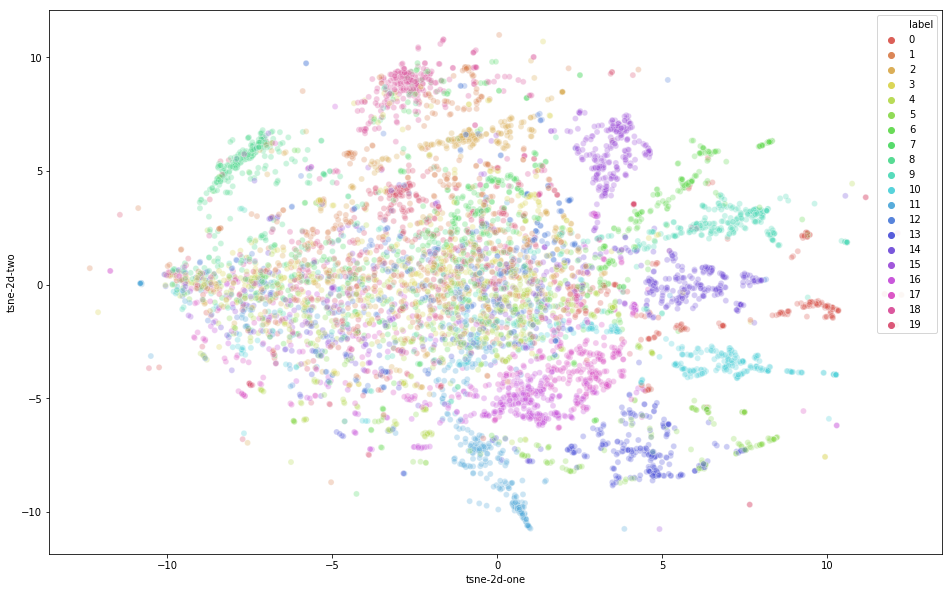

In [44]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset2 = df_subset[df_subset['tsne-2d-one'] < 20]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset2.label.nunique()),
    data=df_subset2,
    legend="full",
    alpha=0.3
)

#### Combined

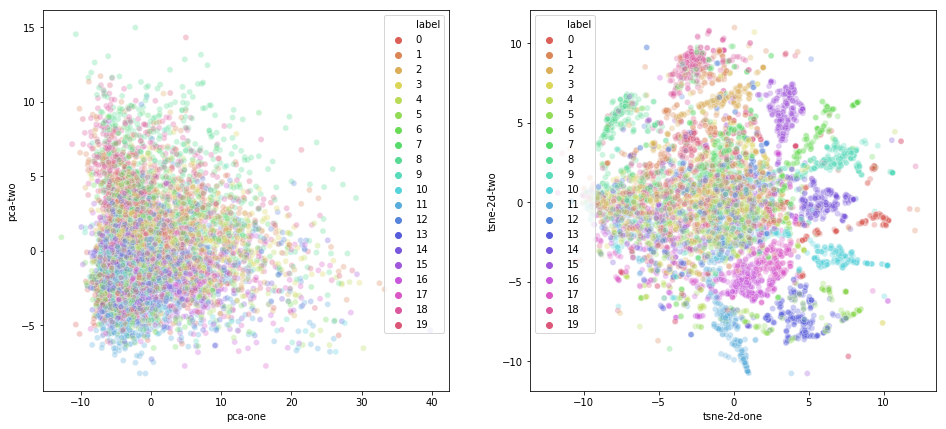

In [45]:
n_class = df_subset2.label.nunique()
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset2,
    legend="full",
    alpha=0.3,
    ax=ax2
)